## Latin Hypercube Sampling From Scratch

In [53]:
import numpy as np
import matplotlib.pyplot as plt

In [60]:
class LatinHypercube():
    def __init__(self, d,scramble=True):
        self.d=d
        self.scramble=scramble
    
    @staticmethod
    def Euclidean(x1, x2):
        return np.sqrt(np.sum((np.array(x1) - np.array(x2))**2,axis=1))    
    
    def random_lhs(self,n=2):
        if not self.scramble:
            samples=.5
        else:
            samples=np.random.uniform(n,self.d)
        
        perms=np.tile(np.arange(1,n+1),
                      (self.d,1))
        for i in range(self.d):
            np.random.shuffle(perms[i,:])
        perms=perms.T
        samples=(perms-samples)/n
        return samples
    
    def maximin_lhs(self,n,N=1000):
        m=self.d
        Xorig=self.random_lhs(n)
        samples = np.random.rand(n, m)
        distances=[]
        index=0
        for k in samples:
            if index <len(samples)-1:           
                distances.append(np.min(LatinHypercube.Euclidean(samples, k)[index+1:]))           
            index+=1

        mindis=np.min(distances)

        if Xorig is not None:
            md2 = np.min(LatinHypercube.Euclidean(samples, Xorig))
            if md2 < mindis:
                mindis = md2


        for _ in range(N):
            distances=[]
            row_indx = np.random.randint(0, n)
            sample_old=np.array(samples[row_indx,:])
            samples[row_indx,:]=np.random.rand(m)
            index=0

            for k in samples:
                if index <len(samples)-1:

                    distances.append(np.min(LatinHypercube.Euclidean(samples, k)[index+1:]))

                index+=1

            mindis_new=np.min(distances)
            if Xorig is not None:
                mdprime2 = np.min(LatinHypercube.Euclidean(samples, Xorig))
                if mdprime2 < mindis_new:
                    mindis_new = mdprime2


            if mindis_new > mindis:
                mindis = mindis_new  # accept
            else:
                samples[row_indx, :] = sample_old  # reject

        return samples
            
      

In [64]:
from scipy.stats import qmc
lhc=LatinHypercube(d=2)
lhs_samples=lhc.random_lhs(n=50)

maximin_lhs_samples=lhc.maximin_lhs(n=50,N=1000)

sampler = qmc.LatinHypercube(d=2)
scipy_lhs_samples = sampler.random(n=50)


Text(0.5, 1.0, 'From Scratch Maximin Latin Hypercube Sampling')

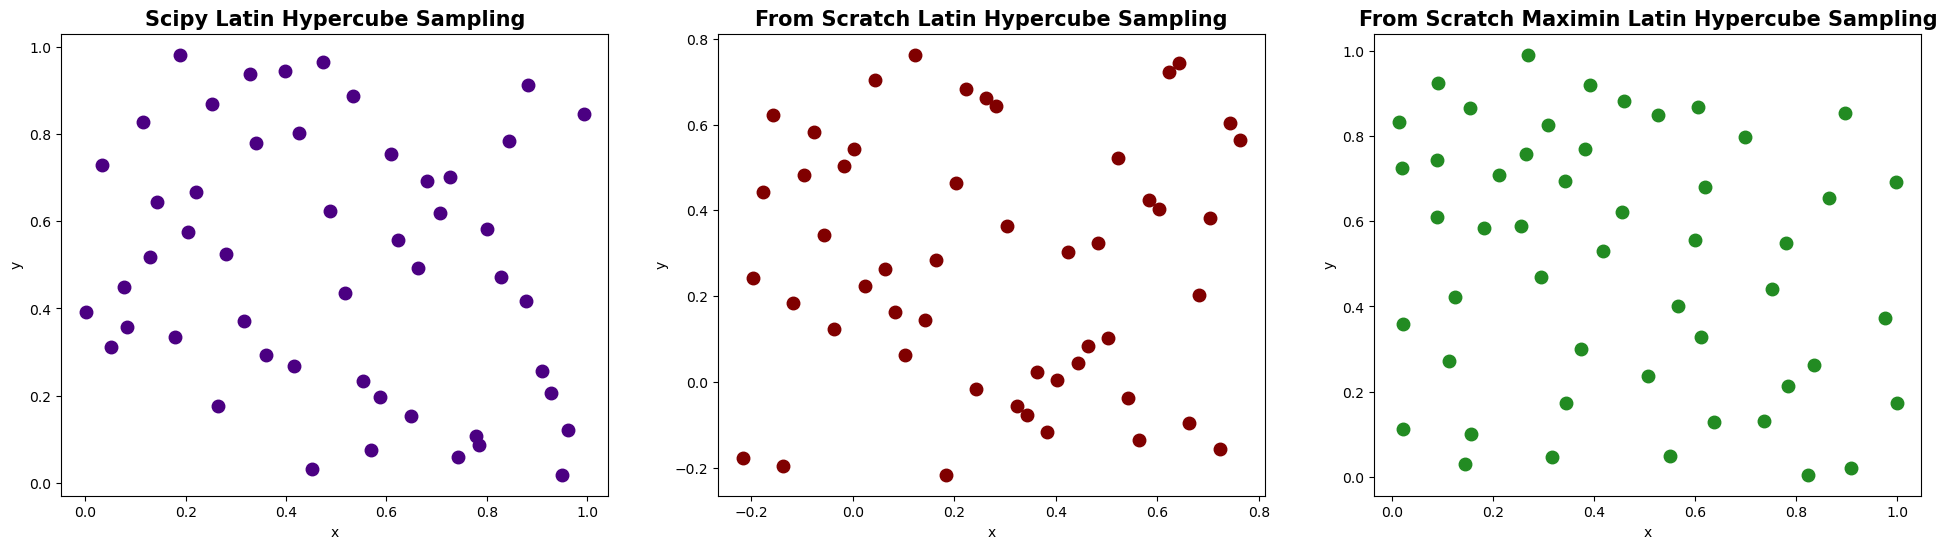

In [84]:
plt.figure(figsize=(24, 6))


plt.subplot(1, 3, 1)
plt.plot(scipy_lhs_samples[:, 0], scipy_lhs_samples[:, 1], "o",color='indigo', markersize=9)
plt.xlabel("x")
plt.ylabel("y")
plt.title('Scipy Latin Hypercube Sampling',fontsize=15, fontweight='bold')

plt.subplot(1, 3, 2)
plt.plot(lhs_samples[:, 0], lhs_samples[:, 1], "o",color='maroon', markersize=9)
plt.xlabel("x")
plt.ylabel("y")
plt.title('From Scratch Latin Hypercube Sampling',fontsize=15, fontweight='bold')

plt.subplot(1, 3, 3)
plt.plot(maximin_lhs_samples[:, 0], maximin_lhs_samples[:, 1], "o",color='forestgreen', markersize=9)
plt.xlabel("x")
plt.ylabel("y")
plt.title('From Scratch Maximin Latin Hypercube Sampling',fontsize=15, fontweight='bold')